In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def compute_objective(X, y, w, b, penalty):
    return np.sum(np.square(X@w+b-y)) + penalty*np.sum(np.abs(w))

def update_b(X,y,w):
    n,_ = X.shape
    return np.sum(y - X@w)/n

def max_penalty(X,y):
    return 2*np.max(np.abs(X.T@(y-np.mean(y))))

def lasso_coordinate_descent(X,y,w0,penalty,tol, debug=False):
    n,d = X.shape
    a = np.zeros(d)
    c = np.zeros(d)
    w_new = np.copy(w0)
    
    gradient_descending = True
    while gradient_descending:
        w_old = np.copy(w_new)
        b = update_b(X,y,w_new)
        for k in range(d):
            a[k] = 2*np.sum(np.power(X[:,k],2))
            c[k] = np.sum(X[:,k]*(y - (b + X@w_new - X[:,k]*w_new[k])))
            
            if c[k] > penalty:
                w_new[k] = (c[k] - penalty)/a[k]
            elif c[k] < -penalty:
                w_new[k] = (c[k] + penalty)/a[k]
            else:
                w_new[k] = 0
                
        if debug:
            obj = compute_objective(X, y, w_new, b, penalty)
            print('obj: {}, w: {}'.format(obj, np.max(np.abs(w_new - w_old))))
        # ... if you're not moving more than tol in any component, exit
        gradient_descending = np.max(np.abs(w_new - w_old)) > tol
    return w_new,b

In [12]:
# Load a csv of floats:
X = np.genfromtxt(r"./datak/upvote_data.csv", delimiter=",")
# Load a text file of integers:
y = np.loadtxt(r"./datak/upvote_labels.txt", dtype=np.int)
y = np.sqrt(y)
# Load a text file of strings:
featureNames = open(r"./datak/upvote_features.txt").read().splitlines()

In [13]:
Xtrain = X[:4000,:]
Xval = X[4000:5000,:]
Xtest = X[5000:,:]

ytrain = y[:4000]
yval = y[4000:5000]
ytest = y[5000:]

In [29]:
n,d = Xtrain.shape

In [34]:
pList = [max_penalty(Xtrain,ytrain)/np.power(3,i) for i in range(9)]
wList = np.zeros([len(pList)+1,d])
bList = np.zeros(len(pList)+1)
wList[0] = np.zeros(d) # we're starting with a penalty that zeros the weights
bList[0] = 0
for iP, aPenalty in enumerate(pList):
    wList[iP+1], bList[iP+1] = lasso_coordinate_descent(Xtrain,ytrain,wList[iP],aPenalty,tol=1e-1)

In [128]:
val_error = [sum_sqr_error(w,b,Xval,yval) for w,b in zip(wList[1:],bList[1:])]
train_error = [sum_sqr_error(w,b,Xtrain,ytrain) for w,b in zip(wList[1:],bList[1:])]

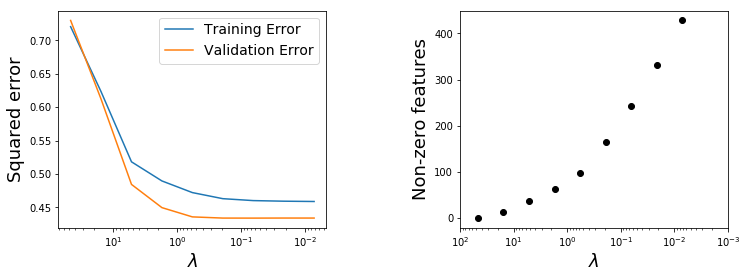

In [129]:
fig, ax = plt.subplots(1,2,figsize=[12,4])
fig.subplots_adjust(wspace=0.5)
ax[0].plot(pList, train_error)
ax[0].plot(pList, val_error)
ax[0].legend(['Training Error','Validation Error'], fontsize=14)
ax[0].set_xscale('log')
ax[0].invert_xaxis()
ax[0].set_xlabel('$\lambda$', fontsize=18)
ax[0].set_ylabel('Squared error', fontsize=18)

ax[1].scatter(pList,[np.sum(w > 0) for w in wList[1:]], color='k')
ax[1].set_xlim([1e2,1e-3])
ax[1].set_xscale('log')
ax[1].set_xlabel('$\lambda$', fontsize=18)
ax[1].set_ylabel('Non-zero features', fontsize=18)

fig.savefig('./figs/hw2_4a.png')

In [147]:
p1 = pList[np.argmin(val_error)]
w1 = wList[np.argmin(val_error)+1]
b1 = bList[np.argmin(val_error)+1]

print('Regularization parameter: {:0.3f}'.format(p1))
print('Non-zero features: {}'.format(np.sum(w1>0)))
print('Train: {:0.3f}, Validation: {:0.3f}, Test: {:0.3f}'
      .format(sum_sqr_error(w1,b1,Xtrain,ytrain),
              sum_sqr_error(w1,b1,Xval,yval),
              sum_sqr_error(w1,b1,Xtest,ytest)))

Regularization parameter: 0.064
Non-zero features: 242
Train: 0.460, Validation: 0.434, Test: 0.515


In [156]:
top10 = w1.argsort()[:10]
[print(featureNames[i]) for i in top10];

sq(UserNumReviews*BusinessIsOpen)
sq(ReviewDate*UserNumReviews)
ReviewDate*UserNumReviews
UserNumReviews*BusinessLatitude
ReviewNumCharacters*BusinessLongitude
ReviewNumStars*UserNumReviews
sq(ReviewNumWords*UserNumReviews)
IsFood*InScottsdale
ReviewInFall*InMesa
ReviewInSpring*UserFunnyVotes
